In [ ]:
# Kernel stride on image

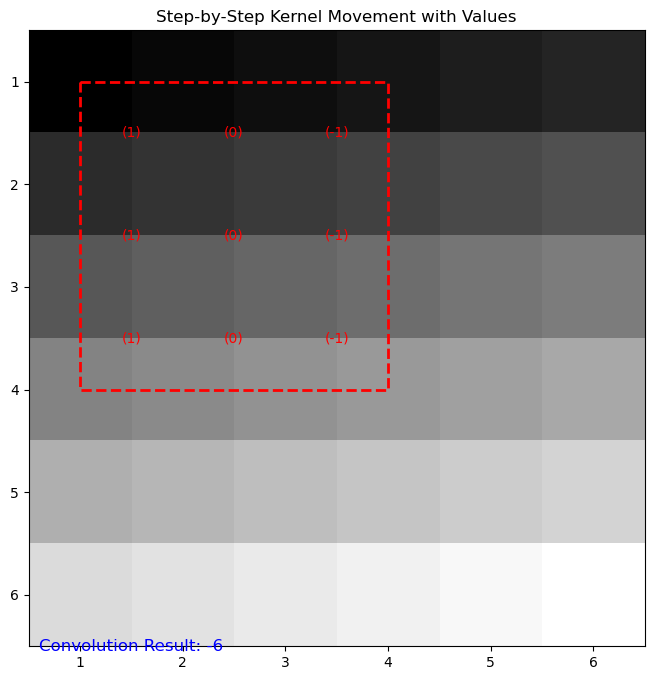

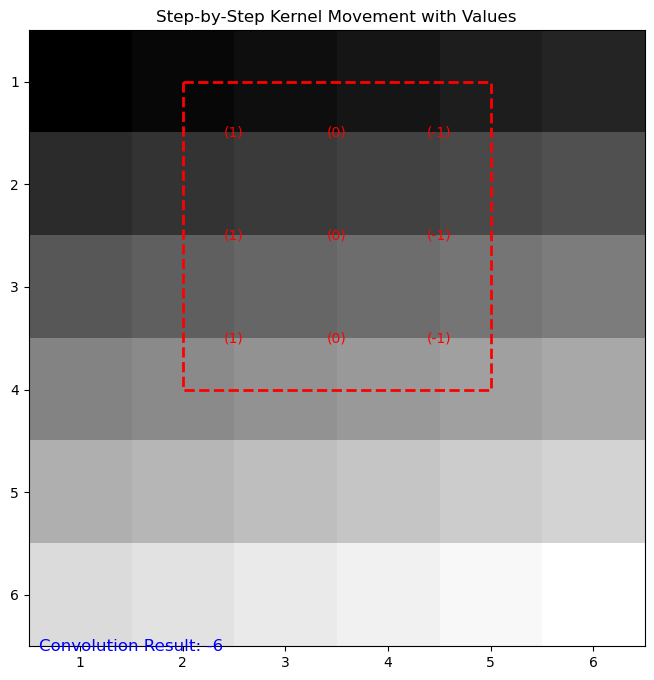

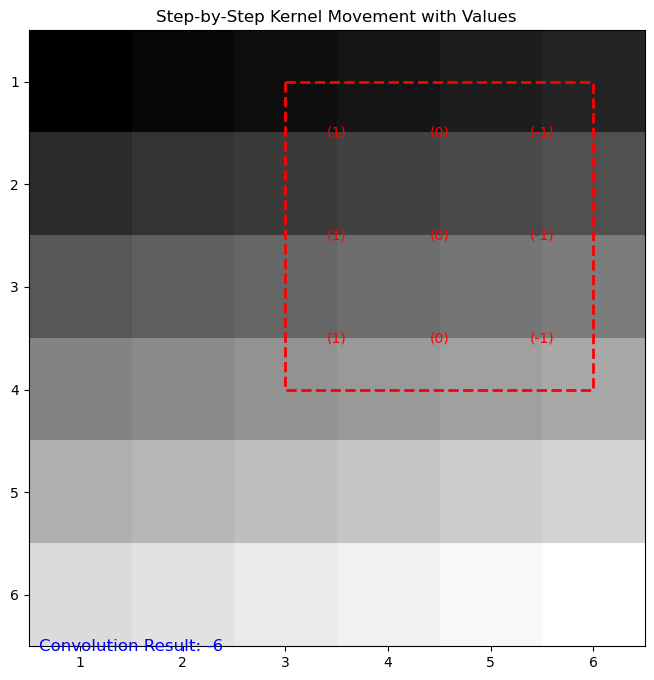

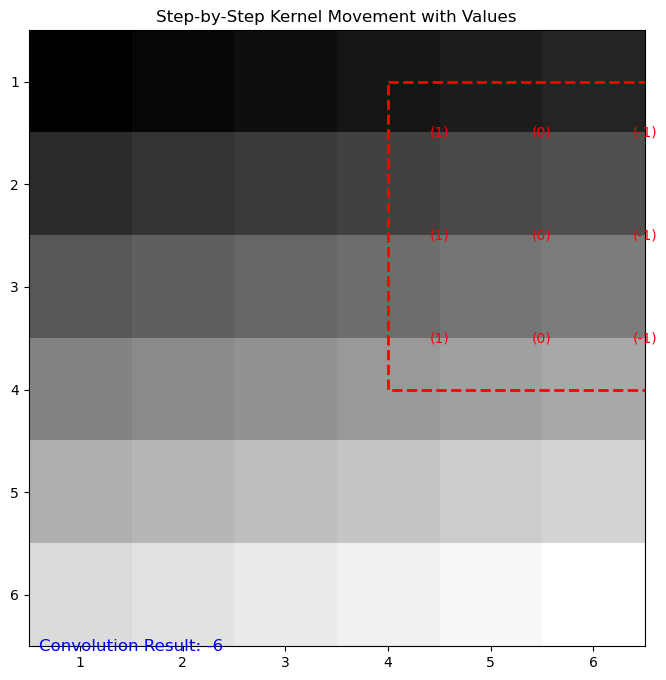

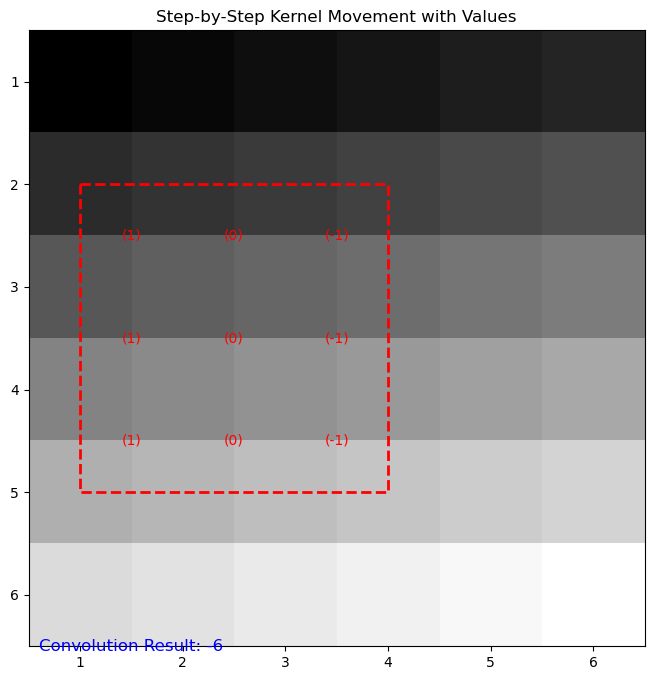

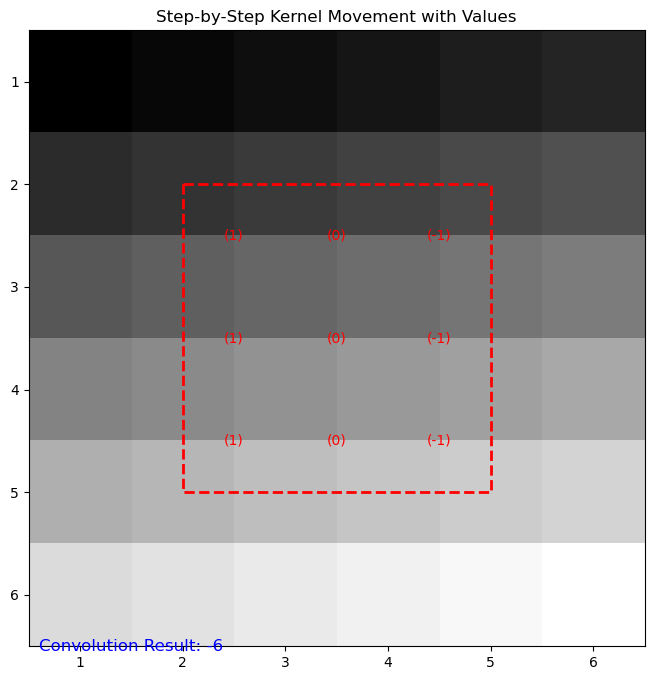

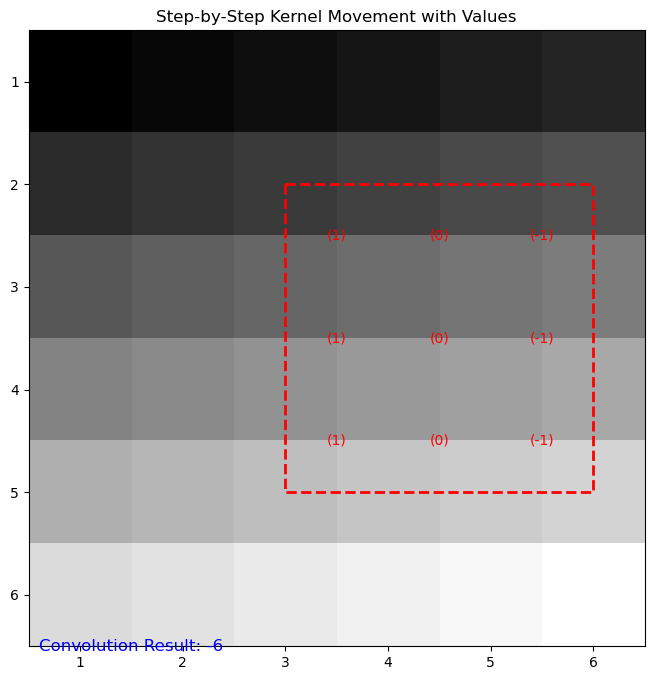

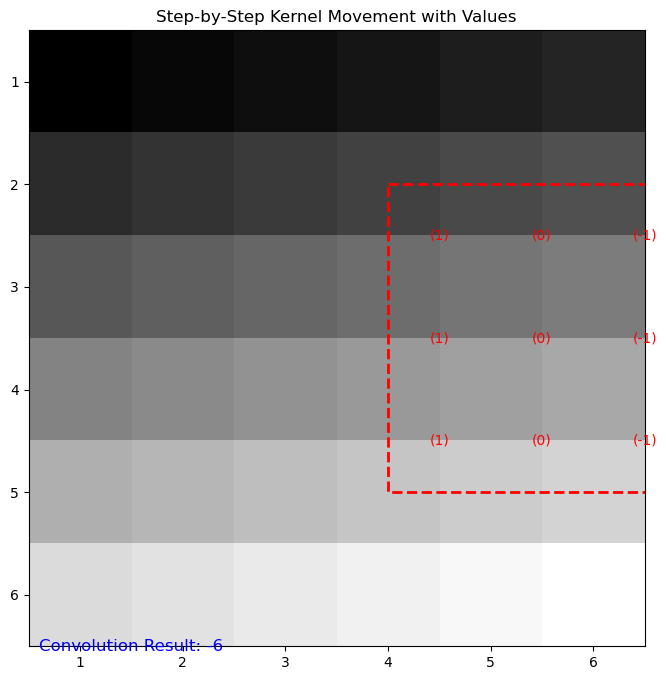

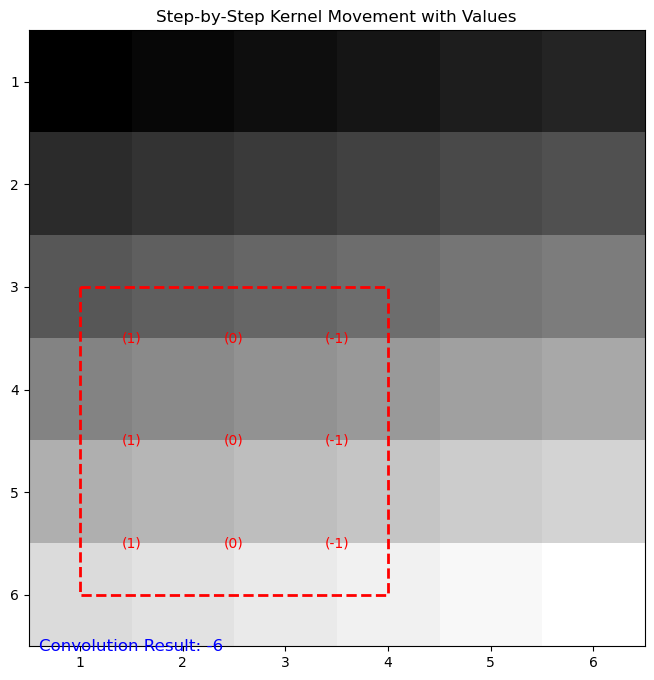

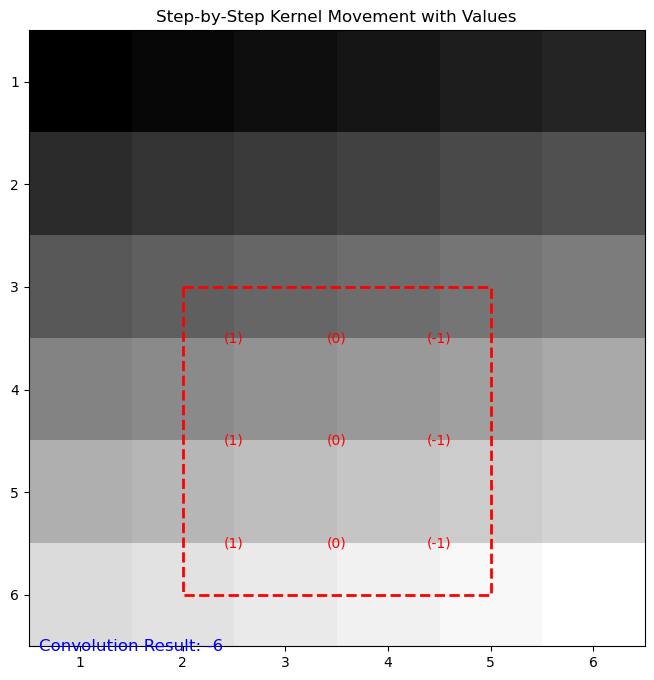

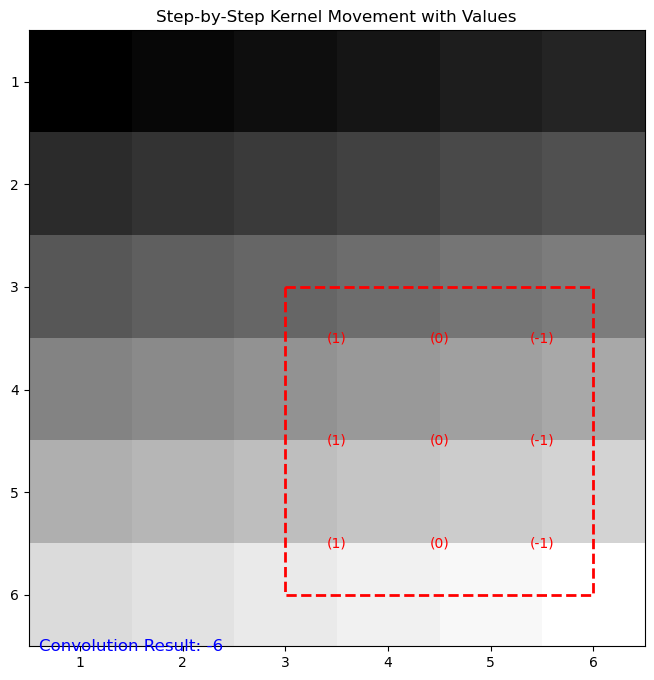

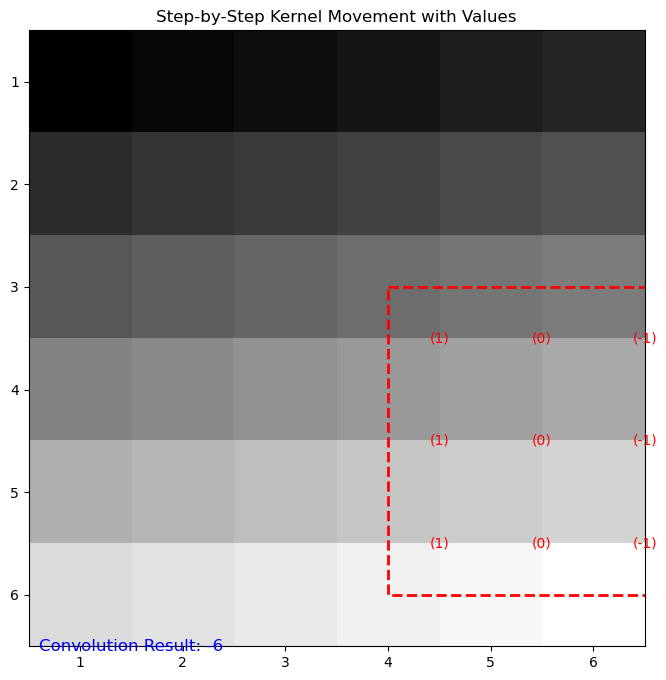

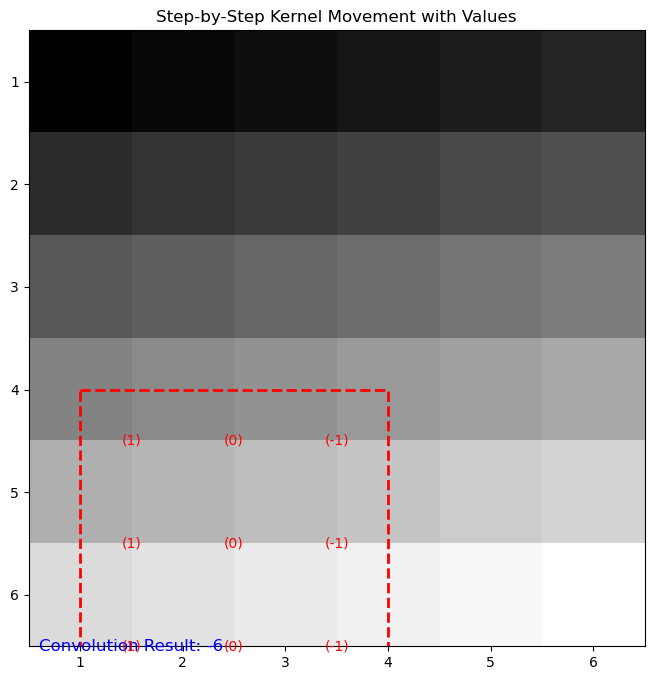

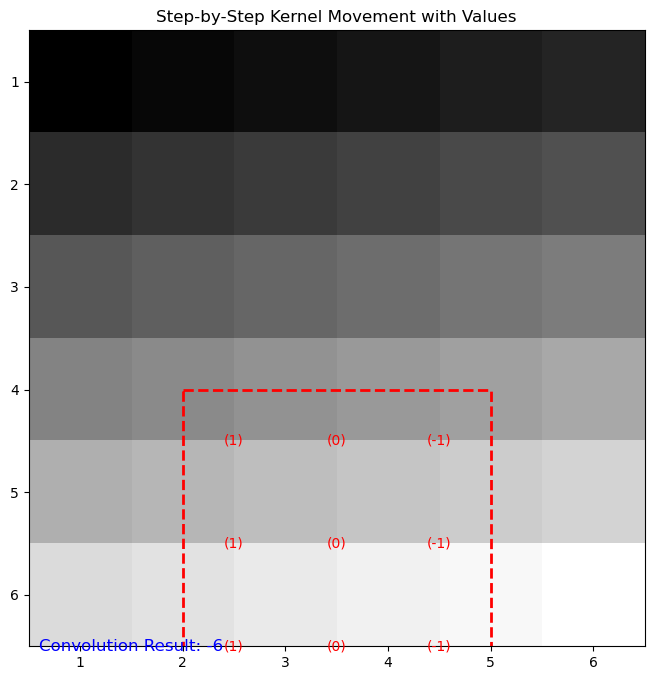

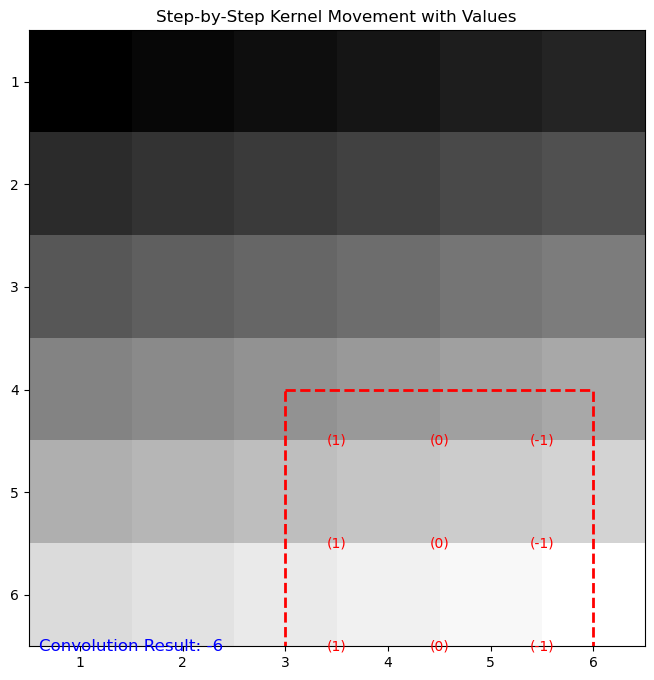

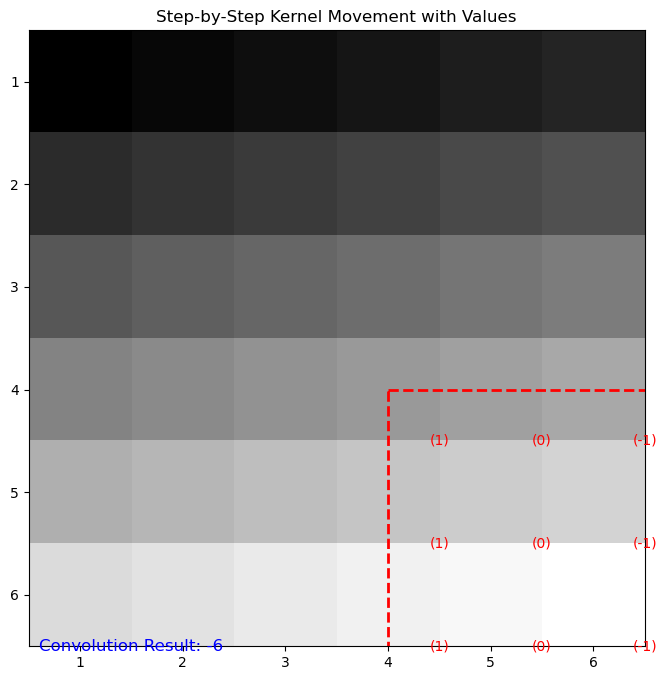

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Step 1: Define a 6x6 custom image (you can modify this)
image = np.arange(1, 37).reshape(6, 6)  # Values from 1 to 36

# Step 2: Define a 3x3 kernel (e.g., edge detection kernel or any custom values)
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])  # Sobel-like kernel

# Step 3: Define stride
stride = 1

# Step 4: Perform manual convolution with stride
def convolve(image, kernel, stride=1):
    kH, kW = kernel.shape
    iH, iW = image.shape
    outH = (iH - kH) // stride + 1
    outW = (iW - kW) // stride + 1

    output = np.zeros((outH, outW))

    for y in range(0, iH - kH + 1, stride):
        for x in range(0, iW - kW + 1, stride):
            region = image[y:y+kH, x:x+kW]
            value = np.sum(region * kernel)
            output[y//stride, x//stride] = value

    return output

# Step 5: Function to plot each step with kernel values annotations
def plot_step(ax, y, x, rect_patch):
    # Perform convolution for the current patch
    region = image[y:y+3, x:x+3]
    result = np.sum(region * kernel)

    # Update the kernel patch position
    rect_patch.set_xy((x, y))  # Update kernel position

    # Add annotation for the convolution result
    ax.text(0.5, 5.5, f"Convolution Result: {result}", color='blue', ha='center', va='center', fontsize=12)
    
    # Annotate kernel values with their coordinates
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            ax.text(x + j + 0.5, y + i + 0.5, f'({kernel[i, j]})', color='red', ha='center', va='center', fontsize=10)

# Step 6: Step-by-step kernel movement
# Loop through each step of the convolution (stride = 1)
steps = []
for y in range(0, image.shape[0] - kernel.shape[0] + 1, stride):
    for x in range(0, image.shape[1] - kernel.shape[1] + 1, stride):
        steps.append((y, x))

# Step 7: Plot each step
for step in steps:
    # Recreate the figure for each stride
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks(np.arange(0, 6, 1))
    ax.set_yticks(np.arange(0, 6, 1))
    ax.set_xticklabels(np.arange(1, 7))
    ax.set_yticklabels(np.arange(1, 7))
    ax.set_title("Step-by-Step Kernel Movement with Values")

    # Plot the image
    ax.imshow(image, cmap='gray')

    # Add a red dashed rectangle to represent the kernel
    rect_patch = patches.Rectangle((0, 0), 3, 3, linewidth=2, edgecolor='red', facecolor='none', linestyle='--')
    ax.add_patch(rect_patch)

    # Plot the kernel at the new position and annotate its values
    plot_step(ax, step[0], step[1], rect_patch)
    
    # Show the updated plot
    plt.show()  # This will render the plot for the current step
